In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import psfws
import datetime


plt.rcParams['font.size']=15
plt.rcParams['axes.labelsize']=15
plt.rcParams['axes.titlesize']=15

In [2]:
# try using draw_datapoint()
def add_datetime1(df):
    """get date time using draw_datapoint"""
    # extracting datetime this way does take a long time
    dt = []
    for i in range(len(df)):
        seed = atm.iloc[i].name
        time = psfws.ParameterGenerator(seed).draw_datapoint()
        dt.append(time)
    df['month'] = [dt[i].month for i in range(len(dt))]
    df['day'] = [dt[i].day for i in range(len(dt))]
    df['hour'] = [dt[i].hour for i in range(len(dt))]
    return dt,df


def get_summaries(path):
    """get data for size, ellipticity, atm"""
    f_psfws = ["size_summary_psfws_df.p", "e1_summary_psfws_df.p", "e2_summary_psfws_df.p","atm_summary_psfws_df.p"]
    size, e1, e2, atm = [pickle.load(open(path+f_psfws[i], "rb")) for i in range(4)]
    return size,e1,e2,atm



def add_datetime(df):
    """retrieve datetime"""
    seed = 771963
    ws = psfws.ParameterGenerator(seed=seed)
    data_fa = ws.__getattribute__("data_fa")

    time = [data_fa.index[i] for i in range(len(data_fa))]
    speeds = {}
    for i in range(len(data_fa)):
        speeds[time[i]] = ws.get_parameters(time[i],nl=6, location="com")['speed']

    dt = []
    for i in range(len(df)):
        for j in range(len(time)):
            if all(df["speed"].iloc[i] == speeds[time[j]]):
                dt.append(time[j])
    df['month'] = [dt[i].month for i in range(len(dt))]
    df['day'] = [dt[i].day for i in range(len(dt))]
    df['hour'] = [dt[i].hour for i in range(len(dt))]
    return dt,df


def plotStepHist(ax,para,binn,change_axis=False, lbl=""):
    """plot step histogram """
    y, bin_edges, _ = ax.hist(para, bins=binn, histtype='step', color="salmon")
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    if change_axis:
        bin_centers = [x+90 if x<90 else x-90 for x in bin_centers]
    return ax


def plot_atm_dist(dt):
    """plot distribution of month, day, hour"""
    fig,ax = plt.subplots(1,3,figsize=(15,4))
    ax[0] = plotStepHist(ax[0], [dt[i].month for i in range(len(dt))],np.arange(1,13))
    ax[0].set_xticks(np.arange(1,13,2))
    ax[0].set_xlabel("Month")

    ax[1] = plotStepHist(ax[1], [dt[i].day for i in range(len(dt))],np.arange(1,32))
    ax[1].set_xticks(np.arange(1,32,5))
    ax[1].set_xlabel("Date")

    ax[2] = plotStepHist(ax[2], [dt[i].hour for i in range(len(dt))],np.arange(0,25))
    ax[2].set_xticks(np.arange(0,25,5))
    ax[2].set_xlabel("Hour (UTC)")

    fig.suptitle("Date time distribution of psfws simulations")
    fig.tight_layout();

In [3]:
# plot angles
def plot_dt_angles(para):
    """plot 2pcf angles"""
    fig,ax = plt.subplots(3,1,figsize=(8,6), sharex=True)
    lbls = ["size","e1","e2"]
    clr = ["darkseagreen","salmon","steelblue"]
    [ax[i].plot_date(para[i]["dt"],para[i]["2p_dir"],label=lbls[i],c=clr[i],linestyle="-",markersize=3.5, linewidth=0.4) for i in range(3)]
    fig.legend(bbox_to_anchor=(1.15,0.6))
    ax[1].set_ylabel("2pcf angles") 
    fig.tight_layout();
    
    
def plot_dt_angles50(para50):
    """plot 2pcf angles<50"""
    fig,ax = plt.subplots(3,1,figsize=(8,6), sharex=True)
    lbls = ["size","e1","e2"]
    clr = ["darkseagreen","salmon","steelblue"]
    [ax[i].plot_date(para50[i]["dt"],para50[i]["2p_dir"],label=lbls[i],c=clr[i],markersize=3.5) for i in range(3)]
    fig.legend(bbox_to_anchor=(1.15,0.6))
    fig.suptitle("Angles < 50 degrees")
    ax[1].set_ylabel("2pcf angles") 
    fig.tight_layout()
    ;
    
    
def plot_autocorr(hrs,months,autocorrM,autocorrH):
    """plot 2pcf mean auto-correlation"""
    fig, ax = plt.subplots(1,3,figsize=(12,4),sharex=True, sharey=True)
    for j in range(3):
        ax[j].scatter(months,autocorrM[j],c="salmon", linewidth=1)
        ax[j].set_xticks([5,6,7,8,9,10])
        ax[j].ticklabel_format(axis="y",scilimits=(0,0))
        ax[j].set_title(['size',"e1","e2"][j])
    fig.suptitle("2pcf mean autocorrelation, by month")
    fig.tight_layout();

    fig, ax = plt.subplots(1,3,figsize=(12,4),sharex=True, sharey=True)
    for j in range(3):
        for i in range(3):
            ax[j].scatter(hrs,autocorrH[j],c="salmon", linewidth=1)
            ax[j].set_xticks([0,3,6,12,18])
            ax[j].ticklabel_format(axis="y",scilimits=(0,0))
            ax[j].set_title(['size',"e1","e2"][j])
    fig.suptitle("2pcf mean autocorrelation, by hour")
    fig.tight_layout();

    
def plot_dt_corrLen(para):
    """plot 2pcf correlation length"""
    fig,ax = plt.subplots(3,1,figsize=(8,6), sharex=True, sharey=True)
    lbls = ["size","e1","e2"]
    clr = ["darkseagreen","salmon","steelblue"]
    [ax[i].plot_date(para[i]["dt"],para[i]["2p_sig"],label=lbls[i],c=clr[i],linestyle="-",markersize=3.5, linewidth=0.5) for i in range(3)]
    fig.legend(bbox_to_anchor=(1.15,0.6))
    ax[1].set_ylabel("correlation length") 
    fig.tight_layout()
    ;

In [4]:
#Plot date,time distributions
path = "summariesCircle/"
size,e1,e2,atm = get_summaries(path)
dt, atm = add_datetime(atm)

# add date time to size, e1, e2 dfs and sort by datetime
para = [size,e1,e2]
size["dt"], e1["dt"], e2["dt"] = dt, dt, dt
[para[i].sort_values(by="dt",inplace=True) for i in range(3)];

# get angles <50
para50 = [para[i][para[i]['2p_dir'] <50] for i in range(3)]

#get mean autocorr
hrs = [0,6,18]
months = np.arange(5,11)
autocorrM = [[para[i][atm['month']==j]['autocorr'].mean() for j in months] for i in range(3)]
autocorrH = [[para[i][atm['hour']==j]['autocorr'].mean() for j in hrs] for i in range(3)]

/tmp/ipykernel_203/4179626064.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  autocorrM = [[para[i][atm['month']==j]['autocorr'].mean() for j in months] for i in range(3)]
/tmp/ipykernel_203/4179626064.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  autocorrH = [[para[i][atm['hour']==j]['autocorr'].mean() for j in hrs] for i in range(3)]


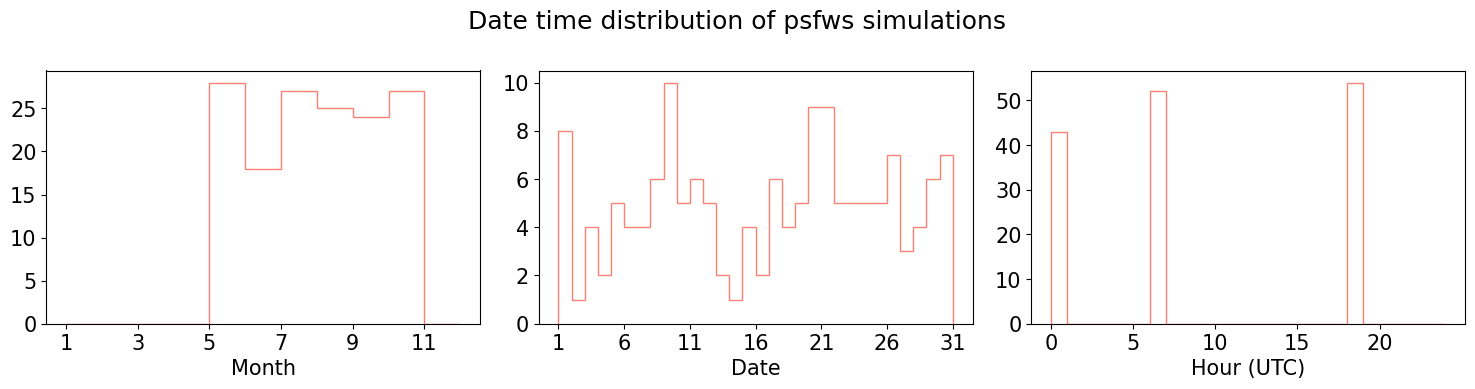

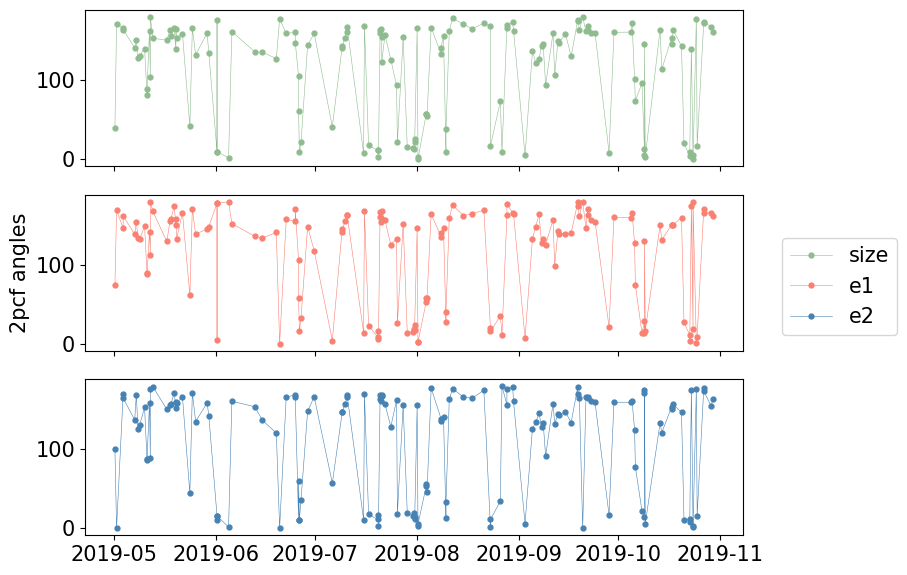

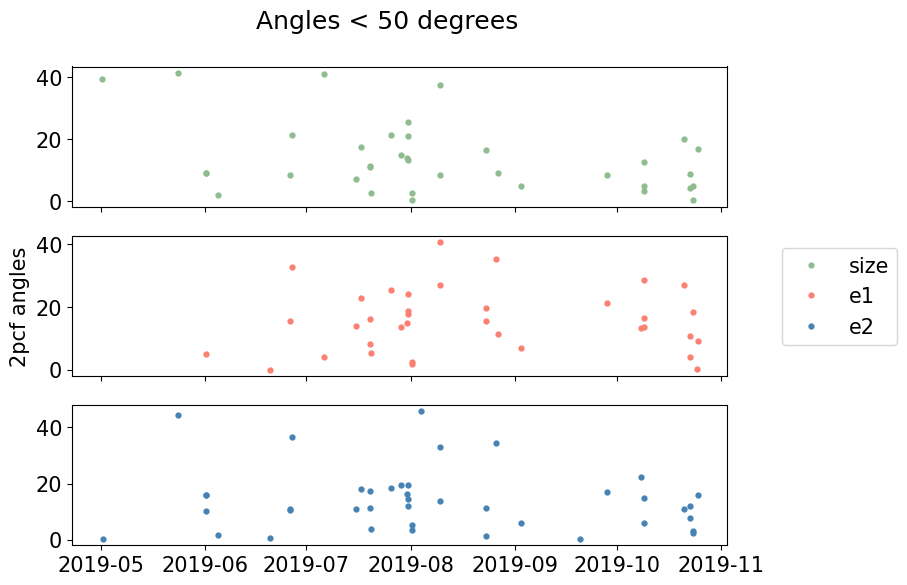

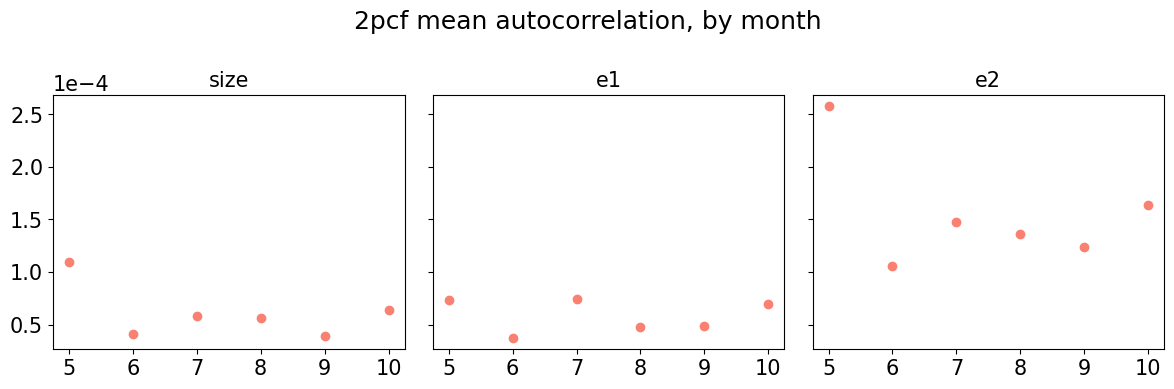

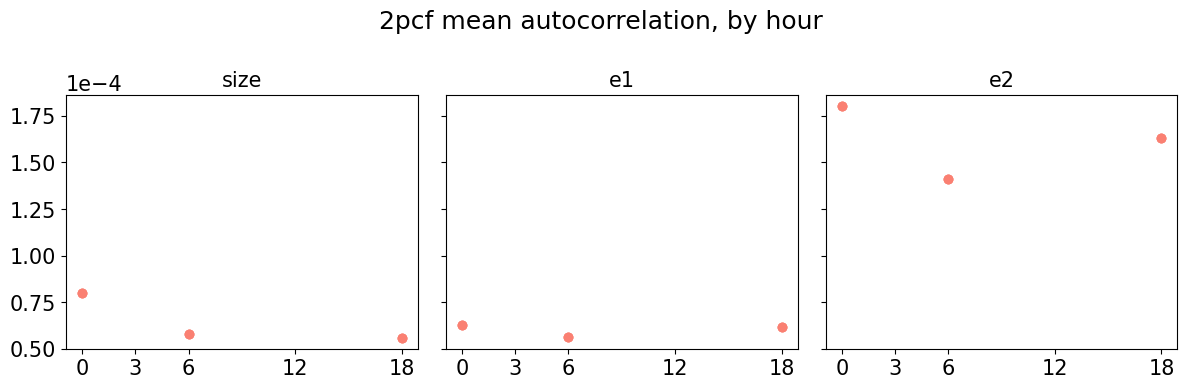

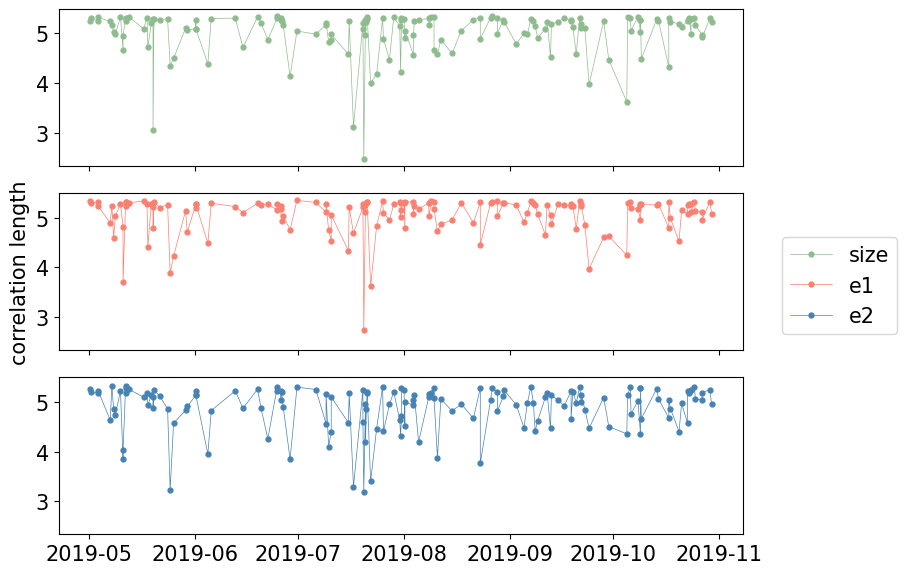

In [5]:
plot_atm_dist(dt)
plot_dt_angles(para)
plot_dt_angles50(para50)
plot_autocorr(hrs,months,autocorrM,autocorrH)
plot_dt_corrLen(para)

In [6]:
# Just checking how plot_date works:)
#sai = size.head(10)
#plt.figure(figsize=(12,4))
#plt.plot_date(sai["dt"],sai["2p_dir"]);